In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals import  joblib

%matplotlib inline

### Leitura dos dados

In [2]:
df_wine = pd.read_csv('dados/winequality-red.csv', delimiter=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Total de vinhos para cada nota

Total de vinhos por nota: 
3 -> 10  vinhos
4 -> 53  vinhos
5 -> 681  vinhos
6 -> 638  vinhos
7 -> 199  vinhos
8 -> 18  vinhos

Total de vinhos:  6


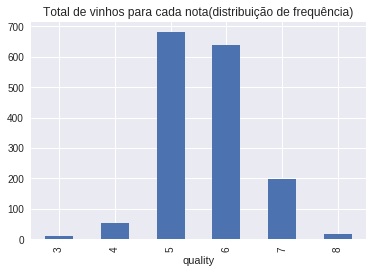

In [3]:
# Obtém o total de vinhos para cada nota
s_wine = df_wine.groupby('quality').count().alcohol

print ('Total de vinhos por nota: ')

for  nota, total in s_wine.iteritems():
    print(nota, '->', total, ' vinhos')
print('\nTotal de vinhos: ', s_wine.count())
s_wine.plot(kind='bar', title='Total de vinhos para cada nota(distribuição de frequência)')

### Matriz de correlação

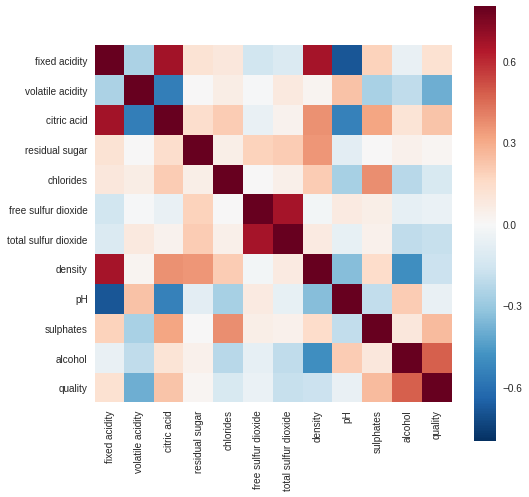

In [4]:
corr_mat = df_wine.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_mat, vmax=.8, square=True)

In [5]:
#df_wine['quality'] = df_wine['quality'].apply(lambda x: 0 if x < 5 else 1)
#df_wine['quality'] = pd.cut(df_wine['quality'], 3, labels=False)

### Média aritmética das notas

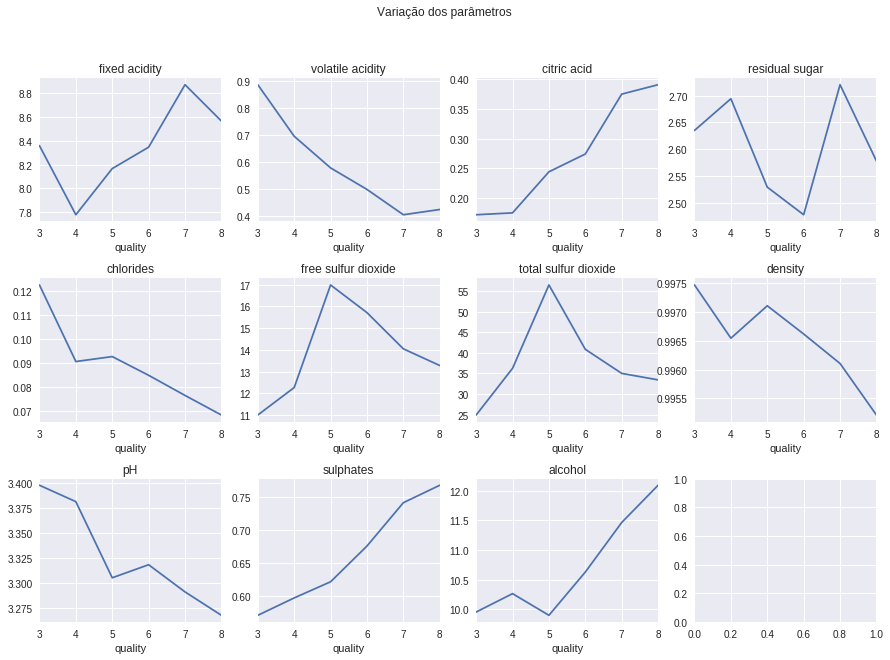

In [6]:
df = df_wine.groupby('quality').mean()

# Definindo gráficos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle("Variação dos parâmetros")

# Aumentando espaço entre gráficos
fig.subplots_adjust(hspace=0.4)

# Plota gráfico com média dos elementos, agrupado pela nota
for i, column in enumerate(df.columns):
    ax = axes[int(i/4)][i % 4]
    
    ax.set_title(column)
    
    df[column].plot(ax=ax)

### Descrição dos dados

In [7]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Distribuição de frequências dos dados(Histograma)

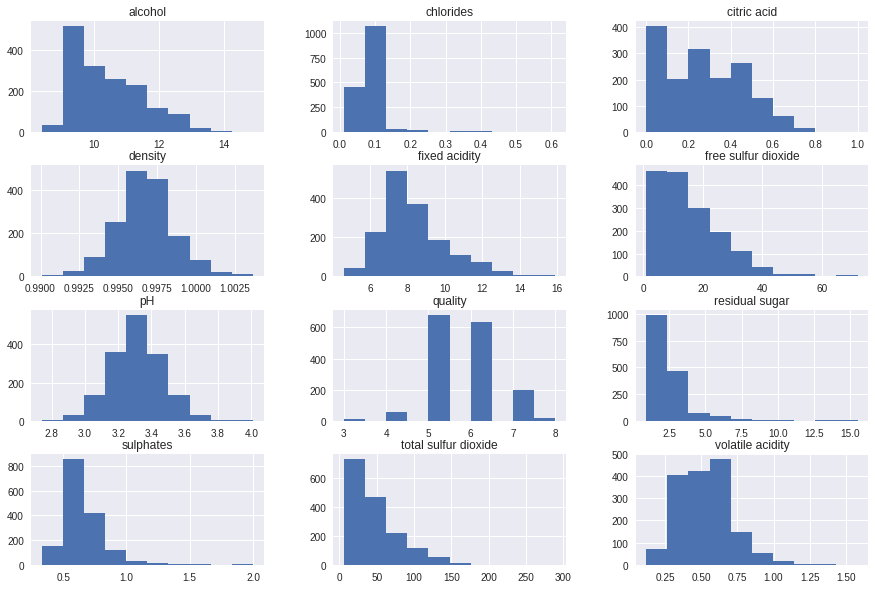

In [8]:
df_wine.hist(figsize=(15,10))
plt.show()

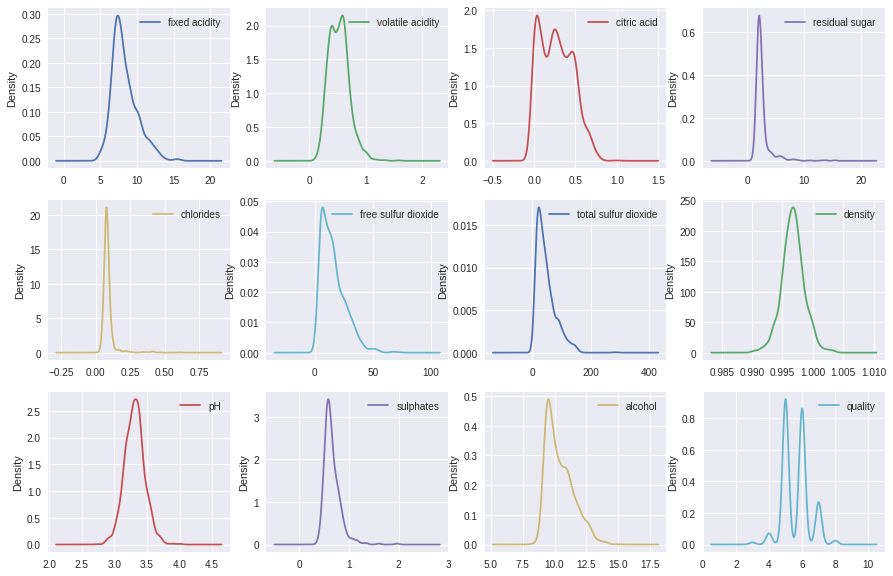

In [9]:
df_wine.plot(kind='density',subplots=True, layout=(3,4), sharex=False, figsize=(15,10) )
plt.show()

### Obtém dados de treino (Parâmetros e nota)

In [10]:
X = df_wine.drop('quality', axis=1)
y = df_wine['quality']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Redes neurais
    
<p>A história das Redes Neurais começa com o trabalho dos pesquisadores Warren McCulloch e Walter Pitts, McCuloch era psiquiatra e neuroanatomista e passou cerca de 20 anos refletindo e estudando sobre a representação do sistema nervoso, em 1942 ele convidou Pitts, que era matemático, para fazer parte das suas pesquisas. Os dois foram os primeiros a descreverem um modelo artificial para um neurônio biológico em 1943</p>

<p>O modelo é formado por um vetor de entradas e as sinapses são representadas por pesos numéricos, a soma ponderada das entradas é submetida à uma função de transferência, ou função de ativação, que determina se a soma é maior que um valor numérico - o limiar do neurônio - se sim, o neurônio é ativado (valor 1) caso contrário, é desativado (valor 0). É muito simples: tudo o que o neurônio faz é responder se a soma recebida é maior que um valor numérico. <a href="http://redesneuraisartificiais.blogspot.com.br/2010/10/o-primeiro-modelo-de-um-neuronio-criado.html">mais</a></p>

<img src='dados/modelo_neuro.png'/>

Uma rede neural artificial é composta por várias unidades de processamento, cujo funcionamento é bastante simples. Essas unidades, geralmente são conectadas por canais de comunicação que estão associados a determinado peso. As unidades fazem operações apenas sobre seus dados locais, que são entradas recebidas pelas suas conexões. O comportamento inteligente de uma Rede Neural Artificial vem das interações entre as unidades de processamento da rede. <a href="http://conteudo.icmc.usp.br/pessoas/andre/research/neural/">mais</a>
<img src='dados/camadas.gif'/>

### Exemplo básico de redes neurais

In [11]:
from sklearn.neural_network import MLPClassifier
X_teste = [[0., 0.], [1., 1.]]
y_teste = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_teste, y_teste)   

# Após o ajuste (treinamento), o modelo pode prever rótulos para novas amostras:
entrada = [[2., 2.], [-1., -2.]]
preds = clf.predict([[2., 2.], [-1., -2.]])

print ('Entrada', entrada[0], ': Saída', preds[0])
print ('Entrada', entrada[1], ': Saída', preds[1])

Entrada [2.0, 2.0] : Saída 1
Entrada [-1.0, -2.0] : Saída 0


### Redes neurais e a classificação de vinhos

In [12]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=100)

clf.fit(X, y)   

score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print ('\ncross_val_score : %f (+/- %.2f)' % (score.mean(), score.std()))

# Após o ajuste (treinamento), o modelo pode prever rótulos para novas amostras:
#clf.predict()


cross_val_score : 0.574305 (+/- 0.06)


### Salvando modelo

In [13]:
joblib.dump(clf, 'model.pk1')

['model.pk1']

### Outros algoritimos de machine learning

In [14]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

n_est = 10

classifiers = {
    'RandomForestClassifier': RandomForestClassifier(
        max_depth=500, min_samples_split=10, n_estimators=100, random_state=1),
    
    'SVM': svm.SVC(C=1.0, random_state=16),
    'ForestClassifier': RandomForestClassifier(n_estimators=n_est, n_jobs=-1, criterion='entropy'),
    'ExtraTreesEntropy': ExtraTreesClassifier(n_estimators=n_est, criterion='gini'),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=n_est, criterion='entropy'),
    'GradientBoost': GradientBoostingClassifier(n_estimators=n_est),
    'BaggingClassifier': BaggingClassifier(), 
    'Decision Tree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
}

graficos = []
for nome, clf in classifiers.items():
    
    # Treinando modelo
    model = clf.fit(X_train, y_train)
    
    # avaliando modelo
    preds = model.predict(X_test)
    print ('\nTaxa de acerto(accurracy score): ', accuracy_score(y_test, preds))
    
    score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print ('cross_val_score %s: %f (+/- %.2f)' % (nome, score.mean(), score.std()))
    
    try:
        # Importancia dos parâmetros
        graficos.append([
            nome,
            pd.Series(model.feature_importances_, index=X.columns.values).sort_values()
        ])
        
    except AttributeError:
        pass



Taxa de acerto(accurracy score):  0.635416666667
cross_val_score ExtraTreesEntropy: 0.541636 (+/- 0.03)

Taxa de acerto(accurracy score):  0.547916666667
cross_val_score GaussianNB: 0.543772 (+/- 0.06)

Taxa de acerto(accurracy score):  0.672916666667
cross_val_score RandomForestClassifier: 0.581154 (+/- 0.04)

Taxa de acerto(accurracy score):  0.620833333333
cross_val_score GradientBoost: 0.586751 (+/- 0.06)

Taxa de acerto(accurracy score):  0.660416666667
cross_val_score ExtraTrees: 0.531741 (+/- 0.05)

Taxa de acerto(accurracy score):  0.59375
cross_val_score Decision Tree: 0.464789 (+/- 0.02)

Taxa de acerto(accurracy score):  0.629166666667
cross_val_score LogisticRegression: 0.576144 (+/- 0.05)

Taxa de acerto(accurracy score):  0.55625
cross_val_score SVM: 0.500943 (+/- 0.03)

Taxa de acerto(accurracy score):  0.639583333333
cross_val_score BaggingClassifier: 0.556666 (+/- 0.03)

Taxa de acerto(accurracy score):  0.641666666667
cross_val_score ForestClassifier: 0.556829 (+/- 0


### Exibindo gráficos de importância dos parâmetros

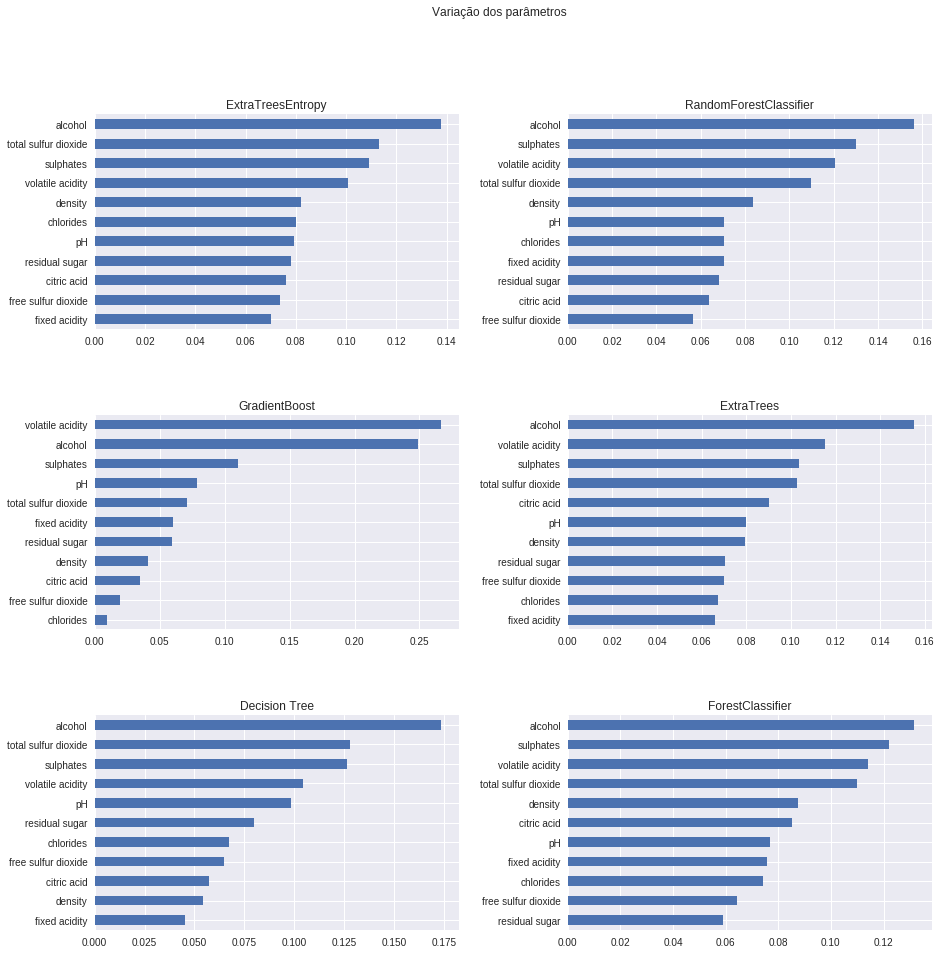

In [15]:
# Definindo gráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle("Variação dos parâmetros")

# Aumentando espaço entre gráficos
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plota gráfico com média dos elementos, agrupado pela nota
for i, grafico in enumerate(graficos):
    ax = axes[int(i/2)][i % 2]
    
    ax.set_title(grafico[0])
    
    grafico[1].plot(kind='barh', ax=ax)